In [23]:
import requests
import json
from pprint import pprint
from config import api_key
import matplotlib.pyplot as plt

In [24]:
# Imports for calculations
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
# Load the CSV file created in Part 1 into a Pandas DataFrame
merged_data_df = pd.read_csv("Output/merged_data.csv")

# Display sample data
merged_data_df.head()

,Unnamed: 0,ori,agency_name,agency_id,state_name,state_abbr,division_name,region_name,region_desc,county_name,agency_type_name,nibrs,nibrs_start_date,latitude,longitude,data_year,offense,cleared,actual
0,0,NC0010000,Alamance County Sheriff's Office,10873,North Carolina,NC,South Atlantic,South,Region III,ALAMANCE,County,True,2019-01-01T00:00:00.000Z,36.041974,-79.399935,2013,violent-crime,84,109
1,1,NC0010000,Alamance County Sheriff's Office,10873,North Carolina,NC,South Atlantic,South,Region III,ALAMANCE,County,True,2019-01-01T00:00:00.000Z,36.041974,-79.399935,2014,violent-crime,81,123
2,2,NC0010000,Alamance County Sheriff's Office,10873,North Carolina,NC,South Atlantic,South,Region III,ALAMANCE,County,True,2019-01-01T00:00:00.000Z,36.041974,-79.399935,2015,violent-crime,97,114
3,3,NC0010000,Alamance County Sheriff's Office,10873,North Carolina,NC,South Atlantic,South,Region III,ALAMANCE,County,True,2019-01-01T00:00:00.000Z,36.041974,-79.399935,2016,violent-crime,77,95
4,4,NC0010000,Alamance County Sheriff's Office,10873,North Carolina,NC,South Atlantic,South,Region III,ALAMANCE,County,True,2019-01-01T00:00:00.000Z,36.041974,-79.399935,2017,violent-crime,34,46


In [29]:
yearly_total_actual = merged_data_df.groupby("data_year")['actual'].sum()
yearly_total_cleared = merged_data_df.groupby("data_year")['cleared'].sum()
yearly_solve_rate = yearly_total_cleared/yearly_total_actual
yearly_crimes_summary_df = pd.DataFrame({
    "Total Crimes Commited Per Year": yearly_total_actual,
    "Total Crimes Solved Per Year": yearly_total_cleared,
    "Solve Rate Per Year": yearly_solve_rate
})
yearly_crimes_summary_df

,Total Crimes Commited Per Year,Total Crimes Solved Per Year,Solve Rate Per Year
data_year,,,
2013,31451,18213,0.579091
2014,30258,17494,0.578161
2015,30331,16595,0.547130
2016,32627,17689,0.542158
2017,32869,17625,0.536220
2018,33039,15832,0.479191
2019,36963,13789,0.373049
2020,44523,16110,0.361835
2021,43168,16150,0.374120


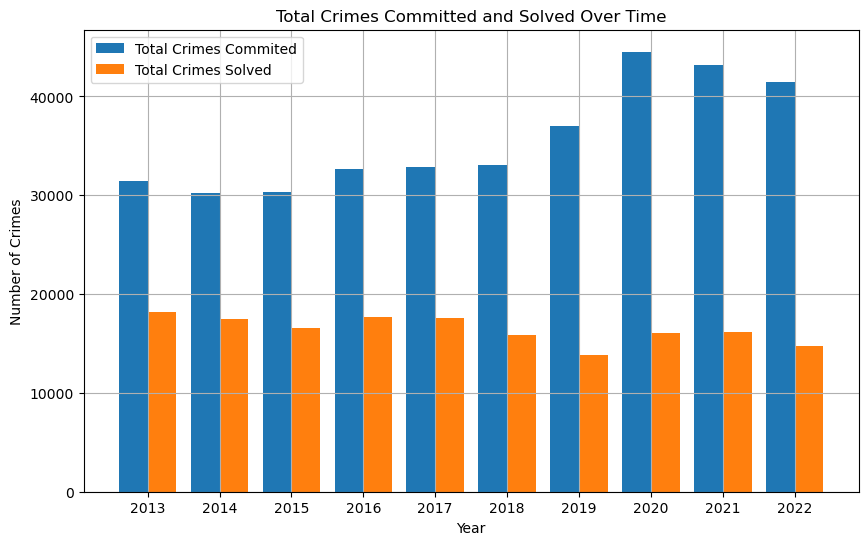

In [48]:
# Total crimes committed and solved over time 
#yearly_crimes_summary_df = yearly_crimes_summary_df.reset_index()

plt.figure(figsize=(10, 6))
bar_width = 0.4  # Adjust this value as needed
bar_positions = merged_data_df['data_year'].unique()
plt.bar(bar_positions - bar_width/2, yearly_crimes_summary_df["Total Crimes Commited Per Year"], width=bar_width, label="Total Crimes Commited")
plt.bar(bar_positions + bar_width/2, yearly_crimes_summary_df["Total Crimes Solved Per Year"], width=bar_width, label="Total Crimes Solved")
plt.title("Total Crimes Committed and Solved Over Time")
plt.xticks(bar_positions)
plt.xlabel("Year")
plt.ylabel("Number of Crimes")
plt.legend(loc="upper left")  # Adjust the location as needed
plt.grid(True)
plt.show()

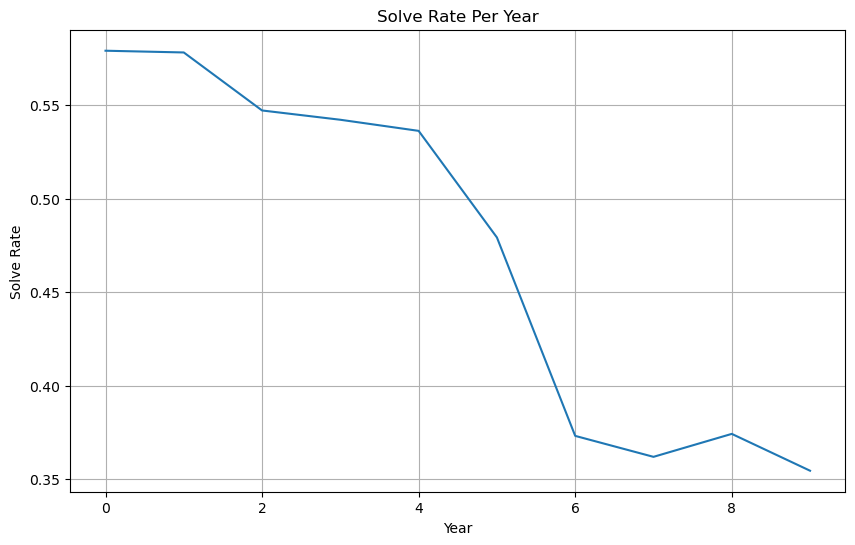

In [36]:
# Solve rate per year
plt.figure(figsize=(10, 6))
plt.plot(yearly_crimes_summary_df.index, yearly_crimes_summary_df["Solve Rate Per Year"])
plt.title("Solve Rate Per Year")
plt.xlabel("Year")
plt.ylabel("Solve Rate")
plt.grid()
plt.show()